# Results check 

This notebook confirms that the results output by `src`, e.g. the synthetic data, the Kalman tracking etc. all look reasonable and nothing odd is going on 

# Setup 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
try:
    sys.path.remove("../src") # Remove src if already exists 
except:
    pass
sys.path.append("../src") # Means that I dont have to make src/ a proper python package

# Synthetic data 

We generate synthetic data to test our scheme. 

Lets make sure this looks reasonable 

In [3]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData

P   = SystemParameters()    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    

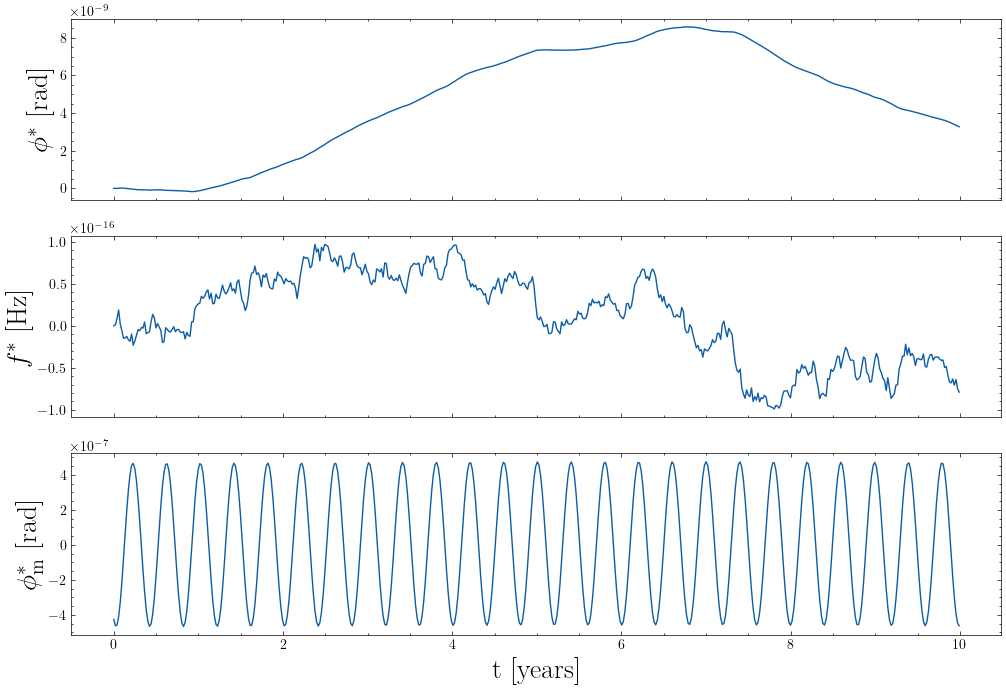

In [9]:
from plotting import plot_synthetic_data
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=1)

Looks reasonable. The measurement (bottom panel) looks a bit clean. We can crank the noise (need to consider what a reasonable physical value is)

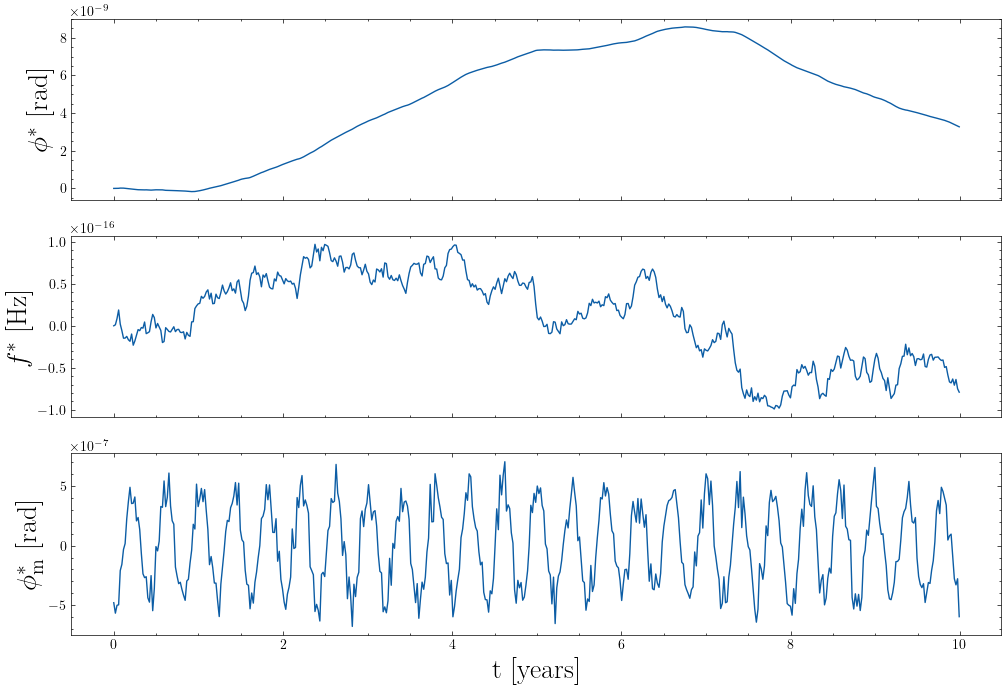

In [14]:

P   = SystemParameters(σm=1e-7)    # User-specifed system parameters
PTA = Pulsars(P)            # All pulsar-related quantities
data = SyntheticData(PTA,P) # Given the user parameters and the PTA configuration, create some synthetic data    
plot_synthetic_data(data.t,data.state_phi,data.state_f,data.phi_measured,psr_index=1)